In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
warnings.warn("second example of warning!")

In [17]:
df = pd.read_csv("/Users/sandeepreddy/Desktop/My_Final_Pro/faang_ds_data.csv")

In [18]:
df

,company,totalyearlycompensation,location,yearsofexperience,year
0,Facebook,370000,"Seattle, WA",8.0,2018
1,Amazon,200000,"Seattle, WA",3.0,2018
2,Google,690000,"Kirkland, WA",10.0,2018
3,Netflix,600000,"Los Gatos, CA",3.0,2018
4,Facebook,225000,"Menlo Park, CA",11.0,2018
...,...,...,...,...,...
645,Amazon,185000,"Seattle, WA",7.0,2018
646,Amazon,260000,"Palo Alto, CA",10.0,2019
647,Amazon,740000,"Seattle, WA",12.0,2019
648,Facebook,150000,"Singapore, SG, Singapore",0.0,2018


In [19]:
df_dv = pd.get_dummies(df)

In [20]:
df_dv

,totalyearlycompensation,yearsofexperience,year,company_AMAZON,company_AMazon,company_AWS,company_Amazon,company_Amazon Web Services,company_Amazon.com,company_Apple,...,"location_Shanghai, SH, China","location_Singapore, SG, Singapore","location_Sunnyvale, CA","location_Taipei, TP, Taiwan","location_Tel Aviv, TA, Israel","location_Toronto, ON, Canada","location_Tulsa, OK","location_Vancouver, BC, Canada","location_Washington, DC","location_Zurich, ZH, Switzerland"
0,370000,8.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200000,3.0,2018,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,690000,10.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,600000,3.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,225000,11.0,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,185000,7.0,2018,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
646,260000,10.0,2019,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,740000,12.0,2019,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,150000,0.0,2018,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
X = df_dv.drop('totalyearlycompensation',axis=1)
Y = df_dv.totalyearlycompensation.values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(Y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     10.20
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.02e-60
Time:                        20:27:36   Log-Likelihood:                -8254.2
No. Observations:                 650   AIC:                         1.664e+04
Df Residuals:                     586   BIC:                         1.692e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.664e+07   7.25e+06     -2.295      0.022   -3.09e+07    -2.4e+06
yearsofexperience                         1.2e+04    875.955     13.699      0.000    1.03e+04    1.37e+04
year                                    9065.2272   3918.213      2.314      0.021    1369.777    1.68e+04
company_AMAZON                         -1.262e+06   5.17e+05     -2.442      0.015   -2.28e+06   -2.47e+05
company_AMazon                         -1.267e+06   5.38e+05     -2.358      0.019   -2.32e+06   -2.12e+05
company_AWS                            -1.191e+06   5.23e+05     -2.276      0.023   -2.22e+06   -1.63e+05
company_Amazon                           -1.2e+06   5.18e+05     -2.319      0.021   -2.22e+06   -1.84e+05
company_Amazon Web Services            -1.112e+06    5.2e+05     -2.140      0.033   -2.13e+06   -9.16e+04
company_Amazon.com                      -1.34e+06   5.27e+05     -2.540      0.011   -2.38e+06   -3.04e+05
company_Apple                          -1.188e+06   5.18e+05     -2.291      0.022   -2.21e+06    -1.7e+05
company_Apple Inc.                     -1.154e+06   5.25e+05     -2.198      0.028   -2.18e+06   -1.23e+05
company_Facebook                       -1.185e+06   5.19e+05     -2.285      0.023    -2.2e+06   -1.66e+05
company_Google                         -1.185e+06   5.18e+05     -2.289      0.022    -2.2e+06   -1.68e+05
company_Netflix                        -9.691e+05   5.17e+05     -1.874      0.061   -1.98e+06    4.63e+04
company_amazon                         -1.196e+06    5.2e+05     -2.300      0.022   -2.22e+06   -1.75e+05
company_facebook                       -1.184e+06   5.29e+05     -2.239      0.026   -2.22e+06   -1.45e+05
company_google                         -1.206e+06    5.2e+05     -2.319      0.021   -2.23e+06   -1.85e+05
location_Antioch, TN                   -3.579e+05   1.69e+05     -2.116      0.035    -6.9e+05   -2.58e+04
location_Arlington, VA                 -3.944e+05   1.62e+05     -2.431      0.015   -7.13e+05   -7.57e+04
location_Atlanta, GA                   -3.459e+05   1.55e+05     -2.238      0.026   -6.49e+05   -4.24e+04
location_Austin, TX                    -3.534e+05   1.52e+05     -2.326      0.020   -6.52e+05    -5.5e+04
location_Bangalore, KA, India          -4.609e+05   1.54e+05     -2.988      0.003   -7.64e+05   -1.58e+05
location_Bengaluru, KA, India          -4.509e+05   1.72e+05     -2.617      0.009   -7.89e+05   -1.13e+05
location_Berlin, BE, Germany           -4.137e+05   1.61e+05     -2.575      0.010   -7.29e+05   -9.82e+04
location_Boston, MA                    -3.095e+05   1.54e+05     -2.010      0.045   -6.12e+05   -7075.459
location_Brampton, ON, Canada          -3.878e+05   1.66e+05     -2.340      0.020   -7

In [24]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

np.mean(cross_val_score(mlr,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-1165423966011482.2

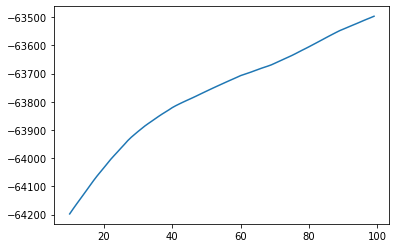

In [25]:
alpha = []
error = []

for i in range(10,100):
    alpha.append(i)
    lml = Lasso(alpha=(i))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 9)))
    
plt.plot(alpha,error)

In [26]:
# lasso regression 
lm_l = Lasso(alpha=100)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-64854.50110007814

In [27]:
rf = RandomForestRegressor(n_jobs=-1)

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-70501.4809607218

In [29]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs_cv = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [30]:
gs_cv.best_score_

-65250.2223920153

In [31]:
gs_cv.best_estimator_

RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=30,
                      n_jobs=-1)

In [32]:
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs_cv.best_estimator_.predict(X_test)

In [33]:
mean_absolute_error(y_test,tpred_lml)

55824.721343539844

In [34]:
mean_absolute_error(y_test,tpred_rf)

56354.61538461538

In [45]:
import pickle
pickl = {'model': gs_cv.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']


In [46]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

410216.6666666667

In [47]:
list(X_test.iloc[1,:])

[0.0,
 2020.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]